<a href="https://colab.research.google.com/github/TheRoberto2512/Morph-Attack-Detection/blob/main/Analisi_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size=6>**FACE MORPHING DETECTION: ANALISI DATASET**</font>
</br><font size=3>*Roberto A. Usai, Davide Senette, Chiara Scalas*</font>



<p style="font-size:4px;" align="justify">Questo notebook svolge un'analisi del dataset mostrando la distribuzione degli elementi per ogni classe.<br><br>In aggiunta, tramite l'ausilio di un file .csv (linkato nel readme.txt presente nel dataset, <a href="https://figshare.com/articles/dataset/Face_Research_Lab_London_Set/5047666?file=27397184">qui</a>), è possibile anche fare analisi relative all'età, al genere e all'etnita degli individui presenti nel dataset. </p>

<font size=4>**Indice:**</font>
*   [Import librerie](#1)
*   [Downloads](#2)
*   [Analisi Dataset](#3)
*   [Analisi .csv](#4)


<a name="1"></a>
# **Import librerie**

In [ ]:
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
import numpy as np
import json
import sys
import os

Prima importiamo le librerie, poi montiamo Google Drive per poter accedere facilmente agli altri file.

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Path della cartella del progetto su Google Drive:

#@markdown Se la cartella del progetto si trova nella root di Drive, scrivere solo il suo nome:
DRIVE_PATH = "MAD Project" #@param {type:"string"}

DRIVE_PATH = '/content/drive/MyDrive/' + DRIVE_PATH

In [ ]:
sys.path.append(DRIVE_PATH)                       # ci permetterà di importare le funzioni presenti in altri file
from shared_utilities import download_dataset

Scarichiamo dal file .json gli ID necessari per il download del dataset e del csv.

In [ ]:
with open(DRIVE_PATH + '/settings.json', 'r') as file:
  config = json.load(file)

DATASET_ID = config['DATASET_ID']
CSV_ID = config['CSV_ID']

<a name="2"></a>
# **Downloads**

In [ ]:
#@title Impostazioni download

#@markdown Nome del zip dataset post download:
DATASET_NAME = 'AMSL_dataset.zip' #@param {type:"string"}

#@markdown Nome del csv post download:
CSV_NAME = 'extra.csv' #@param {type:"string"}

download_dataset(DATASET_ID, DATASET_NAME, msg=True)
download_dataset(CSV_ID, CSV_NAME, msg=True)

Downloading...
From (original): https://drive.google.com/uc?id=1Kasp4gsqJ2wy3Emj_uIZtYsIU3aV-Fb-
From (redirected): https://drive.google.com/uc?id=1Kasp4gsqJ2wy3Emj_uIZtYsIU3aV-Fb-&confirm=t&uuid=a1432d8d-b72f-48b8-91ab-18ff54627a31
To: /content/AMSL_dataset.zip
100%|██████████| 35.5M/35.5M [00:01<00:00, 27.7MB/s]



File scaricato e salvato come AMSL_dataset.zip!



Downloading...
From: https://drive.google.com/uc?id=1h-6NDHOvaVfCqM7FZZ4PAMy-lVIVszsU
To: /content/extra.csv
100%|██████████| 2.07k/2.07k [00:00<00:00, 5.20MB/s]


File scaricato e salvato come extra.csv!



Dopo aver scaricato il dataset lo unzippiamo ed eliminiamo i file txt e la cartella sample_data creata automaticamente da Colab.

In [ ]:
%%capture
# evita il fastidioso output a video

! unzip "{DATASET_NAME}"              # unzippa il file zip
! rm /content/AMSL/*.txt              # elimina i file txt
! rm -r /content/sample_data          # elimina la cartella di default di Colab

<a name="3"></a>
# **Analisi Dataset**

## Distribuzione delle classi

<p align="justify">La prima cosa da verificare è come gli elementi siano stati distribuiti tra le tre classi, quindi effettuiamo i conteggi degli elementi e li visualizziamo in un Bar Chart.</p>

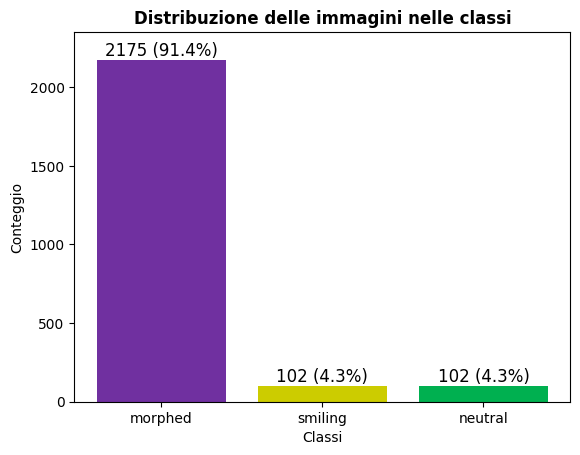

In [ ]:
classi = os.listdir('/content/AMSL')                                             # lista delle classi
elementi = []                                                                    # lista per i conteggi

for i in range(len(classi)):                                                     # per ogni classe...
  count = len(os.listdir('/content/AMSL/' + classi[i]))                          # conta il numero di elementi
  elementi.append(count)                                                         # lo aggiunge alla lista

colori = ["#7030a0", "#cccc00", "#00b050"]                                       # colori per le barre
bars = plt.bar(classi, elementi, colo =colori)                                   # crea il barplot

# stampa ogni valore sopra la sua barra
for bar in bars:
  yval = bar.get_height()                                                        # valore di y
  plt.text(bar.get_x() + bar.get_width()/2.0, yval, "%d (%.1f%%)" % ( int(yval), (int(yval)/sum(elementi)*100) ), va='bottom', ha='center', fontsize=12)

plt.ylim([0, 2350])                                                              # setta il limite superiore del grafico
plt.title("Distribuzione delle immagini nelle classi", fontweight='bold')        # titolo del plot
plt.xlabel("Classi")                                                             # titolo dell'asse x
plt.ylabel("Conteggio")                                                          # titolo dell'asse y
plt.show()                                                                       # visualizza il grafico

<p align="justify">Come è possibile notare dal grafico, sebbene le classi <code>neutral</code> e <code>smiling</code> abbiano lo stesso numero di campioni, il dataset è fortemente sbilanciato e la classe <code>morphed</code> rappresenta oltre il 91% degli elementi.</p>

## Immagini d'esempio


Visualizziamo a schermo una matrice di immagini: nella prima riga ci saranno le prime immagini della cartella `neutral`, nella seconda riga invece ci saranno le prime immagini della cartella `smiling`.

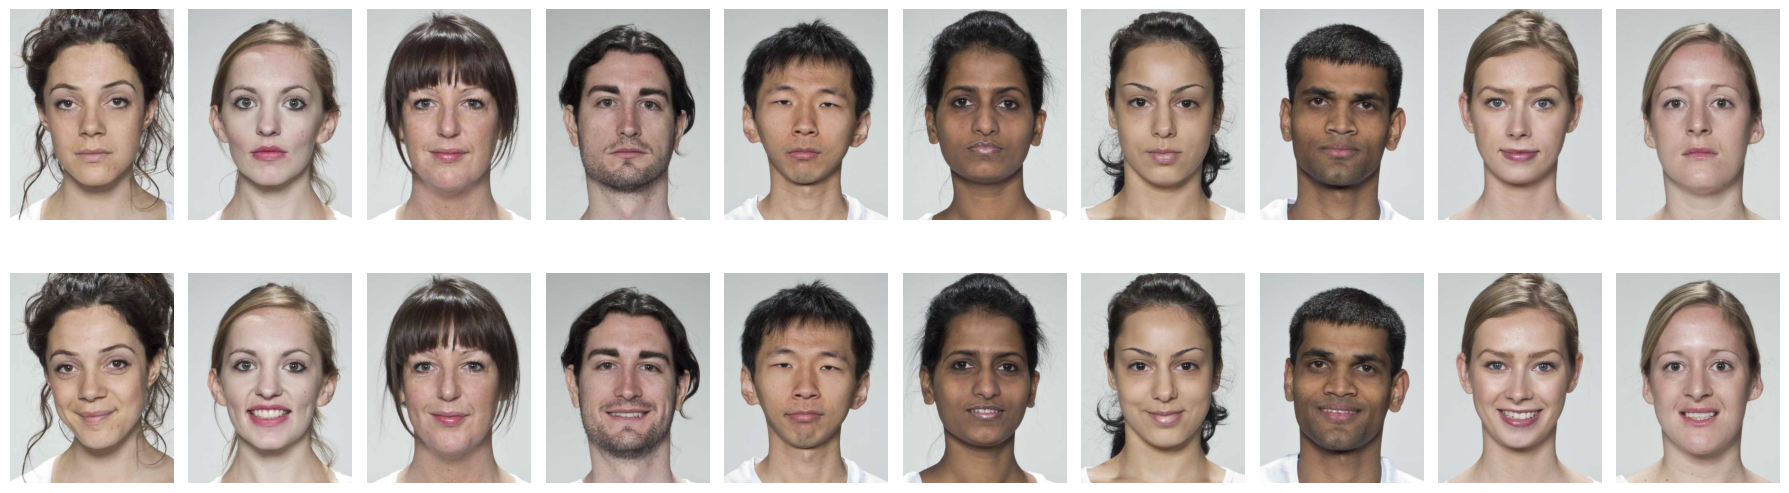

In [ ]:
#@title È possibile personalizzare il <u>numero di colonne</u> e le <u>dimensioni del plot</u>.

#@markdown Numero di colonne:
FIRST_PLOT_COLS = 10 #@param {type:"integer"}

#@markdown Dimensioni del plot:
FIRST_PLOT_LENGTH = 18 #@param {type:"integer"}
FIRST_PLOT_HEIGHT = 6 #@param {type:"integer"}

neutral_files = sorted(os.listdir('/content/AMSL/neutral'))                      # prende la lista ordinata delle immagini neutral
neutral_files = neutral_files[:FIRST_PLOT_COLS]                                  # prende le prime immagini in neutral

smiling_files = sorted(os.listdir('/content/AMSL/smiling'))                      # prende la lista ordinata delle immagini smiling
smiling_files = smiling_files[: FIRST_PLOT_COLS]                                 # prende le prime immagini in neutral

fig, axes = plt.subplots(2, FIRST_PLOT_COLS, figsize=(FIRST_PLOT_LENGTH, FIRST_PLOT_HEIGHT))

for i, filename in enumerate(neutral_files):                                      # per ogni immagine in neutral...
  img = plt.imread(os.path.join('/content/AMSL/neutral', filename))               # leggi l'immagine
  axes[0, i].imshow(img)                                                          # visualizza l'immagine
  axes[0, i].axis('off')                                                          # rimuove gli assi

for i, filename in enumerate(smiling_files):                                      # per ogni immagine in smiling...
  img = plt.imread(os.path.join('/content/AMSL/smiling', filename))               # leggi l'immagine
  axes[1, i].imshow(img)                                                          # visualizza l'immagine
  axes[1, i].axis('off')                                                          # rimuove gli assi

plt.tight_layout()                                                                # ridimensiona il grafico
plt.show()                                                                        # visualizza il grafico

<p align="justify">Come è possibile notare, le classi <code>neutral</code> e <code>smiling</code> contengono le foto di 102 persone, rispettivamente con un'espressione neutrale e con un'espressione sorridente. Nella seconda matrice è possibile visualizzare le prime immagini della cartella <code>morphed</code>.</p>

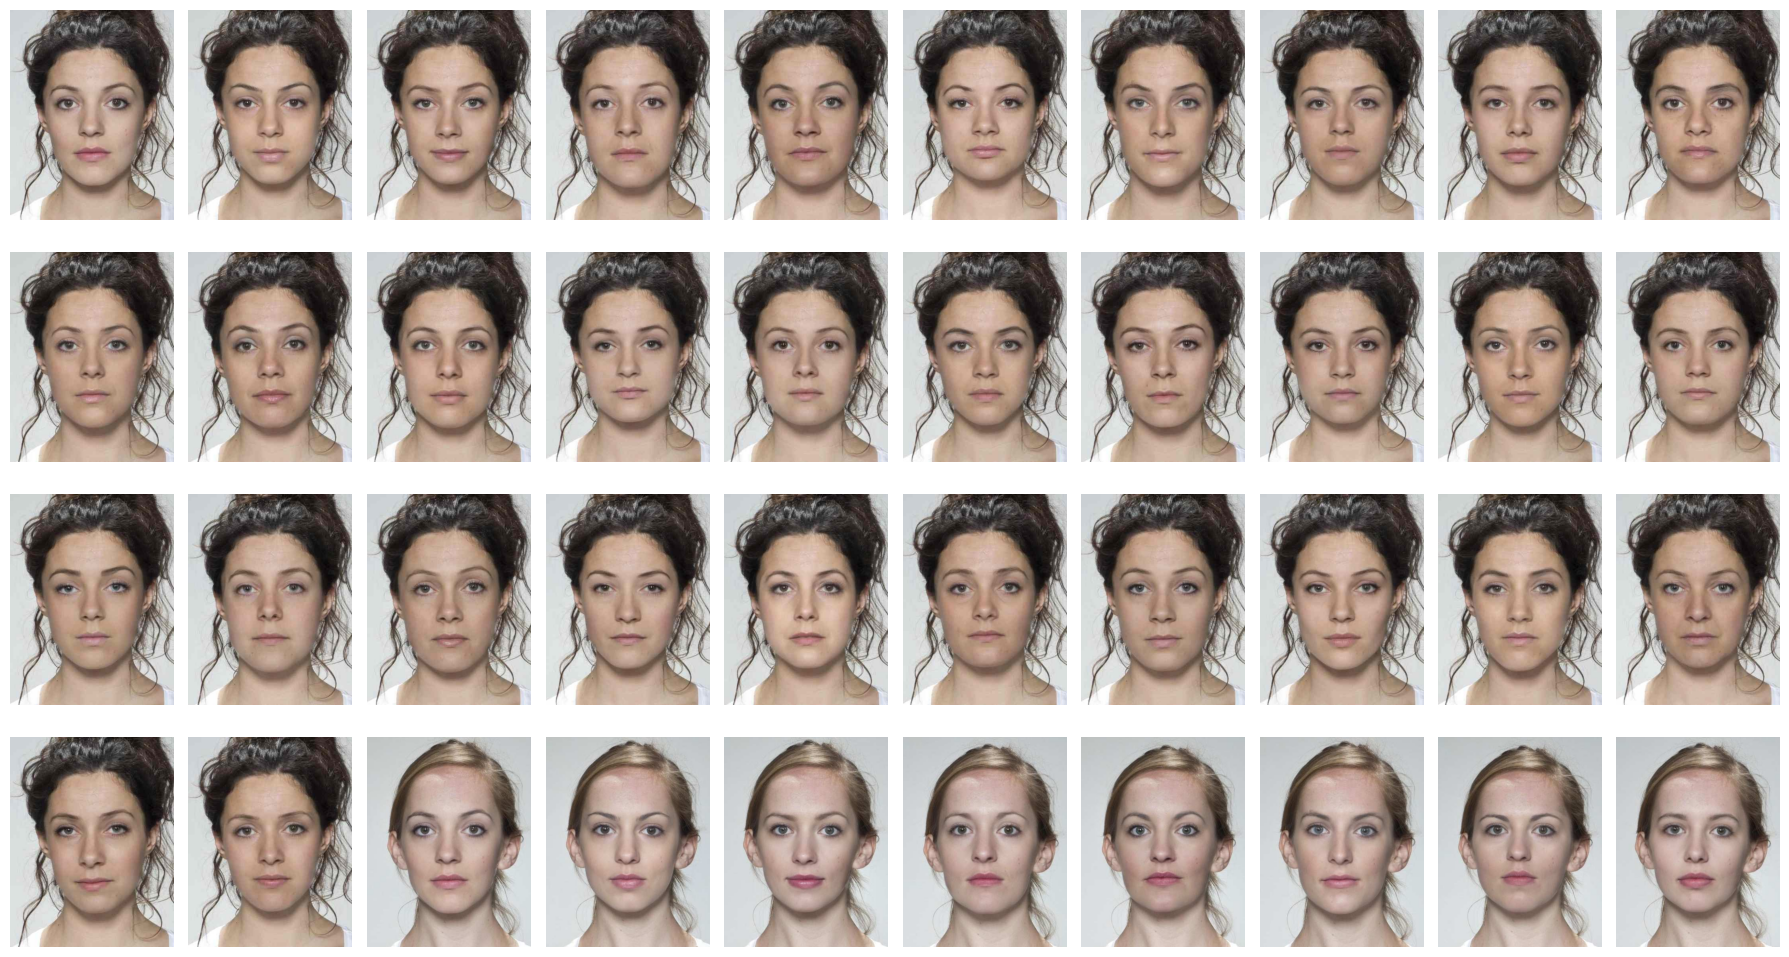

In [ ]:
#@title È possibile personalizzare il <u>numero di righe</u>, il <u>numero di colonne</u> e le <u>dimensioni del plot</u>.

#@markdown Numero di righe:
SECOND_PLOT_ROWS = 4 #@param {type:"integer"}

#@markdown Numero di colonne:
SECOND_PLOT_COLS = 10 #@param {type:"integer"}

#@markdown Dimensioni del plot:
SECOND_PLOT_LENGTH = 18 #@param {type:"integer"}
SECOND_PLOT_HEIGHT = 10 #@param {type:"integer"}

morphed_files = sorted(os.listdir('/content/AMSL/morphed'))                      # prende la lista ordinata delle immagini morphed
morphed_files = morphed_files[:(SECOND_PLOT_ROWS * SECOND_PLOT_COLS)]               # prende le prime immagini in neutral

fig, axes = plt.subplots(SECOND_PLOT_ROWS, SECOND_PLOT_COLS, figsize=(SECOND_PLOT_LENGTH, SECOND_PLOT_HEIGHT))

start, end = 0, SECOND_PLOT_COLS

for r in range(SECOND_PLOT_ROWS):
  for i, filename in enumerate(morphed_files[start:end]):                         # per ogni immagine in neutral...
    img = plt.imread(os.path.join('/content/AMSL/morphed', filename))             # leggi l'immagine
    axes[r, i].imshow(img)                                                        # visualizza l'immagine
    axes[r, i].axis('off')                                                        # rimuove gli assi
  start = end                                                                     # aggiorna il range
  end += SECOND_PLOT_COLS

plt.tight_layout()                                                                # ridimensiona il grafico
plt.show()                                                                        # visualizza il grafico

<p align="justify">La classe <code>morphed</code> contiene i risultati di diversi tentativi di morphing tra le persone contenute nelle prime due classi. Infatti, la seconda matrice, ci permette di notare come le prime 32 immagini sfruttino la stessa persona come 'base', ma differenti persone per effettuare il morph. La notevole differenza di campioni tra la classe <code>morphed</code> e le classi <code>neutral</code> e <code>smiling</code> è dovuta proprio al fatto che ogni persona autentica è stata utilizzata per più immagini morph in più combinazioni differenti.</p>

<a name="4"></a>
# **Analisi .csv**

Trattiamo il .csv come un dataframe usando la libreria Pandas.

In [ ]:
assert CSV_ID != "", "CSV_ID non definito"                                              # ci assicuriamo che esista

df_morphed = pd.read_csv("/content/" + CSV_NAME, encoding='UTF-8')                      # import del csv

Calcoliamo i conteggi più basilari, ovvero quelli legati al genere e all'etnia.

In [ ]:
# conteggio di maschi e femmine
male_count = df_morphed[df_morphed['face_gender'] == 'male'].shape[0]
female_count = df_morphed[df_morphed['face_gender'] == 'female'].shape[0]

# conteggio delle persone in base al numero di etnie
face_eth_white = df_morphed[df_morphed['face_eth'] == 'white'].shape[0]
face_eth_east_asian = df_morphed[df_morphed['face_eth'] == 'east_asian'].shape[0]
face_eth_west_asian = df_morphed[df_morphed['face_eth'] == 'west_asian'].shape[0]
face_eth_black = df_morphed[df_morphed['face_eth'] == 'black'].shape[0]

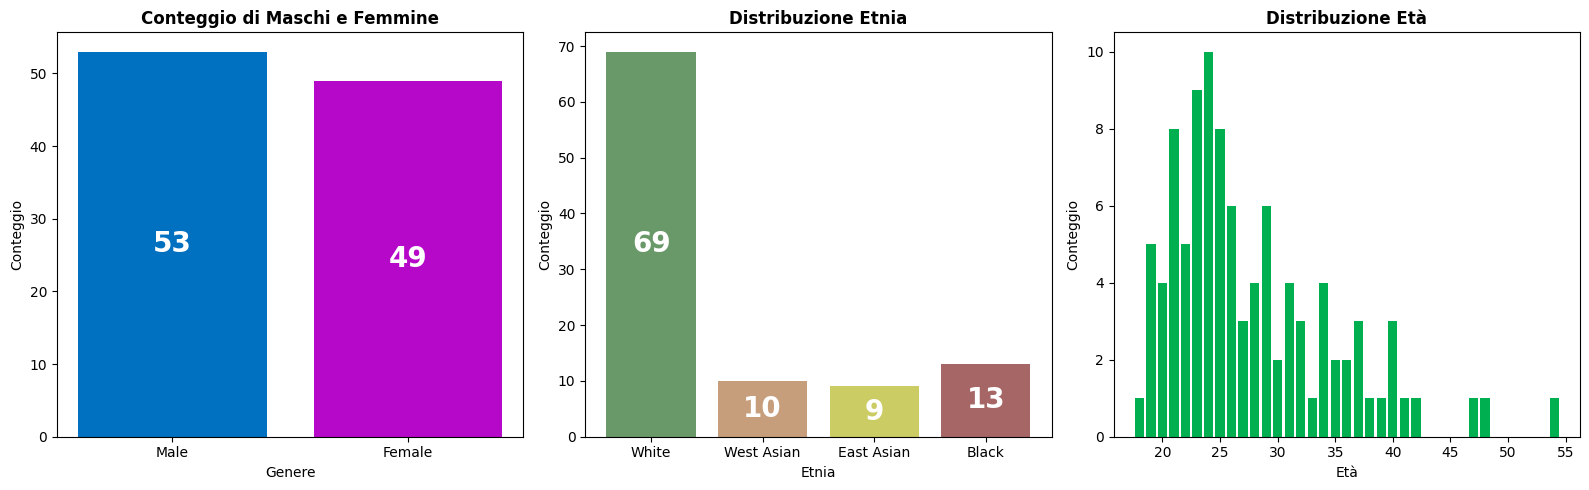

In [ ]:
# RESTITUISCE UNA DISTRIBUZIONE DEL NUMERO DI PERSONE LUNGO LE ETÀ
def distribuzione_eta():
  min_age = int(df_morphed['face_age'].min())
  max_age = int(df_morphed['face_age'].max())                                           # calcolano minimo e massimo

  array_distribuzione = []                                                              # array vuoto

  for i in range(min_age, max_age + 1):                                                 # per ogni età...
    array_distribuzione.append(df_morphed[df_morphed['face_age'] == i].shape[0])        # conta il numero di persone

  return array_distribuzione


# VISUALIZZA I CONTEGGI E LE DISTRIBUZIONI IN TRE DIFFERENTI SUBPLOT
def conteggi_e_distribuzioni():
  fig = plt.figure(num="Analisi Dataset", figsize=(16, 5))                              # crea la figura
  axs = fig.subplots(1, 3, gridspec_kw={'width_ratios': [1, 1, 1]})                     # la divide in tre subplot


  # PRIMO SUBPLOT
  labels = ['Male', 'Female']                                                           # etichette
  values = [male_count, female_count]                                                   # valori
  colors = ['#0070c0', '#b608c8']                                                       # colori

  bars = axs[0].bar(labels, values, color=colors)                                       # crea il barplot

  for bar in bars:
    # stampa ogni valore sopra la sua barra
    axs[0].text(bar.get_x() + bar.get_width() / 2.0, bar.get_height()/2, '%d' % int(bar.get_height()), ha='center', va='center', color='white', fontweight='bold', fontsize=20)

  axs[0].set_title('Conteggio di Maschi e Femmine', fontweight = 'bold')                # titolo del plot
  axs[0].set_xlabel('Genere')                                                           # titolo dell'asse x
  axs[0].set_ylabel('Conteggio')                                                        # titolo dell'asse y


  # SECONDO SUBPLOT
  labels = ['White', 'West Asian', 'East Asian', 'Black']                               # etichette
  values = [face_eth_white, face_eth_west_asian, face_eth_east_asian, face_eth_black]   # valori
  colors = ['#699969', '#c79e7c', '#cccc64', '#a56665']                                 # colori

  bars = axs[1].bar(labels, values, color=colors)                                       # crea il subplot

  for bar in bars:
    axs[1].text(bar.get_x() + bar.get_width() / 2.0, bar.get_height()/2, '%d' % int(bar.get_height()), ha='center', va='center', color='white', fontweight='bold', fontsize=20)

  axs[1].set_title('Distribuzione Etnia', fontweight = 'bold')                          # titolo del plot
  axs[1].set_xlabel('Etnia')                                                            # titolo dell'asse x
  axs[1].set_ylabel('Conteggio')                                                        # titolo dell'asse y


  # TERZO SUBPLOT
  age_labels = list(range(18, 55)) ; age_values = distribuzione_eta()                   # dati per il subplot

  axs[2].bar(age_labels, age_values, color='#00b050')                                   # crea il subplot

  axs[2].set_title('Distribuzione Età', fontweight = 'bold')                            # titolo del plot
  axs[2].set_xlabel('Età')                                                              # titolo dell'asse x
  axs[2].set_ylabel('Conteggio')                                                        # titolo dell'asse y

  plt.tight_layout()
  plt.show()

conteggi_e_distribuzioni()                                                              # esegue la funzione

Le seguenti funzioni serviranno per i plot delle stacked bar chart.

In [ ]:
# CONTA IL NUMERO DI MASCHI E FEMMINE PER OGNI ETNIA
def count_gender_eth(gender='None'):
  count_gender = []

  # conta il numero di persone per ogni etnia
  count_gender.append(df_morphed[(df_morphed['face_gender'] == gender) & (df_morphed['face_eth'] == 'white')].shape[0])
  count_gender.append(df_morphed[(df_morphed['face_gender'] == gender) & (df_morphed['face_eth'] == 'east_asian')].shape[0])
  count_gender.append(df_morphed[(df_morphed['face_gender'] == gender) & (df_morphed['face_eth'] == 'west_asian')].shape[0])
  count_gender.append(df_morphed[(df_morphed['face_gender'] == gender) & (df_morphed['face_eth'] == 'black')].shape[0])

  return count_gender


# CONTA IL NUMERO DI MASCHI O FEMMINE PER OGNI ETA'
def count_age_gender(gender='None'):
  min_age = int(df_morphed['face_age'].min()) ; max_age = int(df_morphed['face_age'].max())
  array_distribuzione = []

  for i in range(min_age, max_age + 1):
    count = df_morphed[(df_morphed['face_gender'] == gender) & (df_morphed['face_age'] == i)].shape[0]
    array_distribuzione.append(count)

  return array_distribuzione


# CONTA LE OCCORRENZE DELLE VARIE ETNIE PER OGNI ETA'
def count_age_ethnicity(ethnicity='None'):
  min_age = int(df_morphed['face_age'].min()) ; max_age = int(df_morphed['face_age'].max())
  array_distribuzione = []

  for i in range(min_age, max_age + 1):
    count = df_morphed[(df_morphed['face_eth'] == ethnicity) & (df_morphed['face_age'] == i)].shape[0]
    array_distribuzione.append(count)

  return array_distribuzione

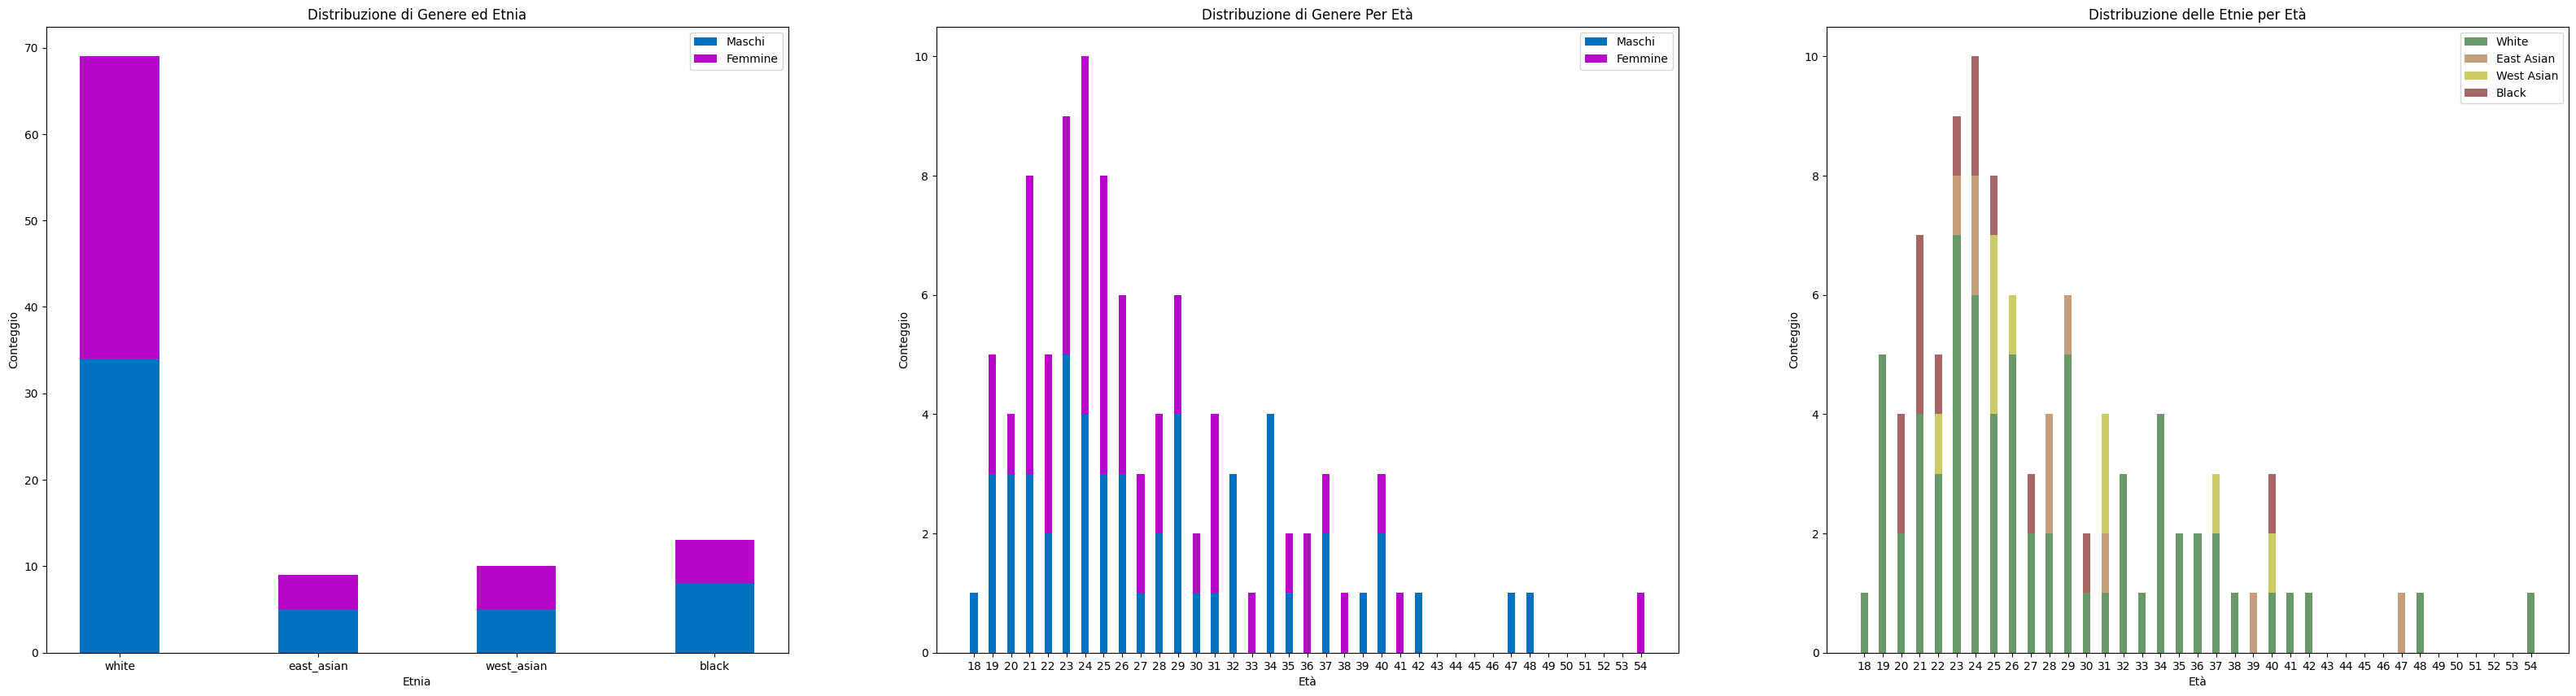

In [ ]:
def stacked_bar_chart():
  fig = plt.figure(num="Analisi Dataset", figsize=(40, 10))                                           # crea la figura
  axs = fig.subplots(1, 3, gridspec_kw={'width_ratios': [1, 1, 1]})                                   # la divide in tre subplot
  min_age = int(df_morphed['face_age'].min()) ; max_age = int(df_morphed['face_age'].max())           # minimo e massimo

  # PRIMO PLOT
  labels = ['white', 'east_asian', 'west_asian', 'black']                                             # etichette per le barre
  males = count_gender_eth(gender='male')                                                             # valori per i maschi
  females = count_gender_eth(gender='female')                                                         # valori per le femmine

  x = range(len(labels))                                                                              # indici per le barre

  axs[0].bar(x, males, width=0.4, label='Maschi', color='#0070c0', align='center')
  axs[0].bar(x, females, width=0.4, label='Femmine', color='#b608c8', bottom=males, align='center')

  # etichette, titolo e legenda
  axs[0].set_xlabel('Etnia')
  axs[0].set_ylabel('Conteggio')
  axs[0].set_title('Distribuzione di Genere ed Etnia')
  axs[0].set_xticks(x)
  axs[0].set_xticklabels(labels)
  axs[0].legend()


  # SECONDO PLOT
  labels = list(range(min_age, max_age + 1))                                                          # etichette per le barre
  males = count_age_gender(gender='male')                                                             # valori per i maschi
  females = count_age_gender(gender='female')                                                         # valori per le femmine

  x = range(len(labels))                                                                              # indici per le barre

  axs[1].bar(x, males, width=0.4, label='Maschi', color='#0070c0', align='center')
  axs[1].bar(x, females, width=0.4, label='Femmine', color='#b608c8', bottom=males, align='center')

  # etichette, titolo e legenda
  axs[1].set_xlabel('Età')
  axs[1].set_ylabel('Conteggio')
  axs[1].set_title('Distribuzione di Genere Per Età')
  axs[1].set_xticks(x)
  axs[1].set_xticklabels(labels)
  axs[1].legend()


  # TERZO PLOT
  labels = list(range(18, 55))                                                                        # etichette per le barre
  white = count_age_ethnicity(ethnicity='white')                                                      # conteggio white
  east_asian = count_age_ethnicity(ethnicity='east_asian')                                            # conteggio east asian
  west_asian = count_age_ethnicity(ethnicity='west_asian')                                            # conteggio west asian
  black = count_age_ethnicity(ethnicity='black')                                                      # conteggio black

  x = range(len(labels))                                                                              # indici per le barre

  axs[2].bar(x, white, width=0.4, label='White', color='#699969', align='center')
  axs[2].bar(x, east_asian, width=0.4, label='East Asian', color='#c79e7c', bottom=white, align='center')
  axs[2].bar(x, west_asian, width=0.4, label='West Asian', color='#cccc64', bottom=[i+j for i,j in zip(white, east_asian)], align='center')
  axs[2].bar(x, black, width=0.4, label='Black', color='#a56665', bottom=[i+j+k for i,j,k in zip(white, east_asian, west_asian)], align='center')

  # etichette, titolo e legenda
  axs[2].set_xlabel('Età')
  axs[2].set_ylabel('Conteggio')
  axs[2].set_title('Distribuzione delle Etnie per Età')
  axs[2].set_xticks(x)
  axs[2].set_xticklabels(labels)
  axs[2].legend()

  plt.show()

stacked_bar_chart()                                                                                    # richiama la funzione

In [ ]:
# Funzione per calcolare e visualizzare statistiche generali del dataset
def print_dataset_stats():
  df = df_morphed.drop(['face_id'], axis=1)                                      # rimuove la colonna face_id

  print("\nDimensioni: {}".format(df_morphed.shape))                             # stampa le dimensioni

  missing_values = df.isnull().sum()                                             # calcola i valori mancanti

  # Converti in stringa e rimuovi 'dtype'
  missing_values_str = str(missing_values).split('\n')                           # divide la stringa in righe
  missing_values_str = "\n".join(missing_values_str[:-1])                        # rimuove l'ultimo elemento, ovvero la riga con "dtype: int64"

  print("\n\nValori mancanti: \n{}".format(missing_values_str))

  print("\n\nValori duplicati: {}".format(df.duplicated().sum()))                # calcola i valori duplicati

  print("\n\nStatistiche sull'età:")
  print("Età massima: {}".format(df.describe().loc['max'][0]))                   # età massima
  print("Età minima: {}".format(df.describe().loc['min'][0]))                    # età minima
  print("Età media: {}".format(df.describe().loc['mean'][0]))                    # età media
  print("Scostamento: %.2f" % (df.describe().loc['std'][0]))                     # scostamento dalla media

  print("\n\nQuartili:")
  print("1° quartile (25%): {}".format(df.describe().loc['25%'][0]))             # 25%
  print("2° quartile (50%): {}".format(df.describe().loc['50%'][0]))             # 50%
  print("3° quartile (75%): {}".format(df.describe().loc['75%'][0]))             # 75%

print_dataset_stats()                                                            # chiama la funzione


Dimensioni: (102, 4)


Valori mancanti: 
face_age       2
face_gender    0
face_eth       0


Valori duplicati: 34


Statistiche sull'età:
Età massima: 54.0
Età minima: 18.0
Età media: 27.72
Scostamento: 7.11


Quartili:
1° quartile (25%): 23.0
2° quartile (50%): 25.5
3° quartile (75%): 31.25
